# Chương 9: Spot-Check Algorithms

- Sau khi có dữ liệu, bước đầu tiên là thử nghiệm nhanh nhiều thuật toán.
- Mục tiêu:
  + Tìm thuật toán nào có tiềm năng nhất cho bài toán.
  + Không cần tinh chỉnh gì nhiều, chỉ chạy mặc định.

In [77]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Đường dẫn đến file CSV
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# Tải dữ liệu từ file CSV mà không đưa tiêu đề vào
dataframe = read_csv(filename, names=names, header=0)
# Chuyển đổi DataFrame thành mảng numpy
array = dataframe.values
# Tách mảng thành các thành phần đầu vào và đầu ra
X = array[:, 0:8]  # Các thuộc tính đầu vào
Y = array[:, 8]     # Thuộc tính đầu ra
# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# Khởi tạo mô hình Logistic Regression
model = LogisticRegression(solver='liblinear')  # Tăng số vòng lặp tối đa
model.fit(X_train, Y_train)
# Đánh giá mô hình
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result * 100.0))

Accuracy: 75.984%


In [101]:
# Đánh giá bằng K-Fold Cross Validation
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# Đường dẫn đến file CSV
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# Tải dữ liệu từ file CSV mà không đưa tiêu đề vào
dataframe = read_csv(filename, names=names, header=0)
# Chuyển đổi DataFrame thành mảng numpy
array = dataframe.values
# Tách mảng thành các thành phần đầu vào và đầu ra
X = array[:, 0:8]  # Các thuộc tính đầu vào
Y = array[:, 8]     # Thuộc tính đầu ra
# Đánh giá bằng K-Fold Cross Validation
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)  # Bật xáo trộn
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
# In kết quả
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean() * 100.0, results.std() * 100.0))

Accuracy: 77.086% (5.091%)


In [107]:
# Đánh giá bằng Leave-One-Out Cross Validation
from sklearn.model_selection import LeaveOneOut
num_folds = 10
loocv = LeaveOneOut()
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.823% (42.196%)


In [119]:
# Đánh giá bằng Repeated K-Fold Cross Validation
from sklearn.model_selection import ShuffleSplit
n_splits = 10
test_size = 0.33
seed = 7
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.535% (1.681%)


# Chương 10: Machine Learning Algorithm Performance Metrics

- Mục tiêu chương:
  + Hiểu về các thước đo đánh giá hiệu năng mô hình.
  + Áp dụng đúng thước đo cho từng bài toán: classification hoặc regression.
- Các phần chính:
  + Đánh giá classification model.
  + Đánh giá regression model.

In [134]:
# Độ chính xác (Classification Accuracy)
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
model = LogisticRegression(solver='liblinear')
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.771 (0.051)


In [138]:
# Logarithmic Loss (Log Loss)
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
model = LogisticRegression(solver='liblinear')
scoring = 'neg_log_loss'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.494 (0.042)


In [142]:
# Area Under ROC Curve (AUC)
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
model = LogisticRegression(solver='liblinear')
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.826 (0.050)


In [150]:
 # Cross Validation Classification Confusion Matrix
from sklearn.metrics import confusion_matrix
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[141  21]
 [ 40  52]]


In [158]:
# Cross Validation Classification Report
from sklearn.metrics import classification_report
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.78      0.87      0.82       162
         1.0       0.71      0.57      0.63        92

    accuracy                           0.76       254
   macro avg       0.75      0.72      0.73       254
weighted avg       0.75      0.76      0.75       254



In [164]:
 # Cross Validation Regression MAE
from sklearn.linear_model import LinearRegression
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
model = LinearRegression(solver='liblinear')
scoring = 'neg_mean_absolute_error'
 results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
 print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -0.337 (0.020)


In [55]:
# Cross Validation Regression MSE
from pandas import read_csv
from sklearn.model_selection import KFold, cross_val_score
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
         'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, sep=",", names=names, header=0)
array = dataframe.values
X = array[:, 0:13]
Y = array[:, 13]
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -23.747 (11.143)


In [63]:
# Cross Validation Regression R^2
model = LinearRegression()
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: 0.718 (0.099)


# Chương 11: Spot-Check Classification Algorithms

- Mục tiêu chương:
  + So sánh hiệu suất nhiều thuật toán classification khác nhau.
  + Sử dụng K-fold cross validation để đánh giá mô hình một cách công bằng.
- Các mô hình được sử dụng: LR, LDA, KNN, CART, NB, SVM

In [94]:
# Logistic Regression Classification
from pandas import read_csv  # Nhập thư viện để đọc file CSV
from sklearn.model_selection import KFold  # Nhập KFold để thực hiện cross-validation
from sklearn.model_selection import cross_val_score  # Nhập cross_val_score để đánh giá mô hình
from sklearn.linear_model import LogisticRegression  # Nhập LogisticRegression từ scikit-learn
filename = 'pima-indians-diabetes.data.csv'  # Đường dẫn tới file dữ liệu
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']  # Tên các cột trong dữ liệu
dataframe = read_csv(filename, names=names, header=0)  # Đọc dữ liệu từ file CSV và chỉ định tên cột
array = dataframe.values  # Chuyển đổi DataFrame thành mảng numpy
X = array[:,0:8]  # Tách các đặc trưng (features) từ cột 0 đến cột 7
Y = array[:,8]  # Tách biến mục tiêu (target) từ cột 8
num_folds = 10  # Số lượng fold cho cross-validation
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=7)  # Khởi tạo KFold với số fold và random seed
model = LogisticRegression(max_iter=200)  # Khởi tạo mô hình Logistic Regression với số vòng lặp tối đa
results = cross_val_score(model, X, Y, cv=kfold)  # Đánh giá mô hình bằng cross-validation
print(results.mean())  # In ra độ chính xác trung bình của mô hình

0.7721633629528366


In [77]:
# LDA Classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7669685577580315


In [81]:
# KNN Classification
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7109876965140123


In [83]:
# Gaussian Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7591421736158578


In [96]:
# SVM Classification
from sklearn.svm import SVC
model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.760457963089542


# Chương 12: Spot-Check Regression Algorithms

- Mục tiêu chương:
  + So sánh hiệu suất giữa các thuật toán hồi quy phổ biến.
  + Áp dụng metric R² để đánh giá mức độ giải thích dữ liệu.
- Các mô hình được sử dụng: LR, LASSO, ElasticNet, CART, SVR

In [112]:
# Linear Regression
from pandas import read_csv  # Nhập thư viện để đọc file CSV
from sklearn.model_selection import KFold  # Nhập KFold để thực hiện cross-validation
from sklearn.model_selection import cross_val_score  # Nhập cross_val_score để đánh giá mô hình
from sklearn.linear_model import LinearRegression  # Nhập LinearRegression từ scikit-learn
filename = 'housing.csv'  # Đường dẫn tới file dữ liệu
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']  # Tên các cột trong dữ liệu
dataframe = read_csv(filename, sep=",", names=names, header=0)  # Đọc dữ liệu từ file CSV và chỉ định tên cột
array = dataframe.values  # Chuyển đổi DataFrame thành mảng numpy
X = array[:, 0:13]  # Tách các đặc trưng (features) từ cột 0 đến cột 12
Y = array[:, 13]  # Tách biến mục tiêu (target) từ cột 13
kfold = KFold(n_splits=10, shuffle=True, random_state=7)  # Khởi tạo KFold với số fold và random seed
model = LinearRegression()  # Khởi tạo mô hình Linear Regression
scoring = 'neg_mean_squared_error'  # Đặt tham số đánh giá là độ lỗi bình phương âm
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)  # Đánh giá mô hình bằng cross-validation
print(results.mean())  # In ra độ chính xác trung bình của mô hình

-23.746501811313504


In [114]:
# Ridge Regression
from sklearn.linear_model import Ridge
model = Ridge()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-23.889890185053424


In [116]:
# Lasso Regression
from sklearn.linear_model import Lasso
model = Lasso()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-28.74589007585154


In [118]:
# ElasticNet Regression
from sklearn.linear_model import ElasticNet
model = ElasticNet()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-27.908420360231055


In [120]:
# KNN Regression
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-38.852320266666666


In [122]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-22.87118


In [124]:
# SVM Regression
from sklearn.svm import SVR
model = SVR()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-67.64140705473743


# Chương 13: Compare Classification Algorithms with Standardized Data

- Mục tiêu chương:
  + So sánh các mô hình classification trong điều kiện dữ liệu đã được chuẩn hoá.
- Các bước chính:
  + Sử dụng Pipeline để kết hợp StandardScaler và mô hình.

LR: 0.770865 (0.050905)
LDA: 0.766969 (0.047966)
KNN: 0.710988 (0.050792)
CART: 0.682433 (0.054806)
NB: 0.759142 (0.038960)
SVM: 0.760458 (0.034712)


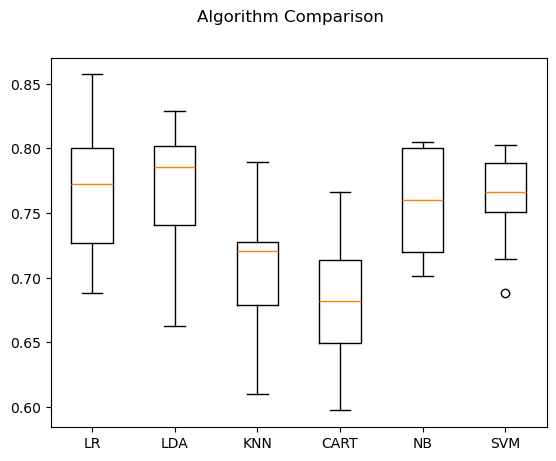

In [141]:
# Compare Algorithms
from pandas import read_csv  # Nhập thư viện để đọc file CSV
from matplotlib import pyplot  # Nhập thư viện để vẽ đồ thị
# load dataset
filename = 'pima-indians-diabetes.data.csv'  # Đường dẫn tới file dữ liệu
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']  # Tên các cột trong dữ liệu
dataframe = read_csv(filename, names=names, header=0)  # Đọc dữ liệu từ file CSV và chỉ định tên cột
array = dataframe.values  # Chuyển đổi DataFrame thành mảng numpy
X = array[:,0:8]  # Tách các đặc trưng (features) từ cột 0 đến cột 7
Y = array[:,8]  # Tách biến mục tiêu (target) từ cột 8
# prepare models
models = []  # Khởi tạo danh sách mô hình
models.append(('LR', LogisticRegression(solver='liblinear', max_iter=200)))  # Thêm Logistic Regression vào danh sách
models.append(('LDA', LinearDiscriminantAnalysis()))  # Thêm LDA vào danh sách
models.append(('KNN', KNeighborsClassifier()))  # Thêm KNN vào danh sách
models.append(('CART', DecisionTreeClassifier()))  # Thêm Decision Tree vào danh sách
models.append(('NB', GaussianNB()))  # Thêm Naive Bayes vào danh sách
models.append(('SVM', SVC()))  # Thêm SVM vào danh sách
# evaluate each model in turn
results = []  # Khởi tạo danh sách kết quả
names = []  # Khởi tạo danh sách tên mô hình
scoring = 'accuracy'  # Đặt tham số đánh giá là độ chính xác
for name, model in models:  # Duyệt qua từng mô hình
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)  # Khởi tạo KFold với số n_split và random seed
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)  # Đánh giá mô hình bằng cross-validation
    results.append(cv_results)  # Thêm kết quả vào danh sách
    names.append(name)  # Thêm tên mô hình vào danh sách
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())  # Tạo thông điệp hiển thị kết quả
    print(msg)  # In ra kết quả
# boxplot algorithm comparison
fig = pyplot.figure()  # Tạo một figure mới
fig.suptitle('Algorithm Comparison')  # Đặt tiêu đề cho đồ thị
ax = fig.add_subplot(111)  # Thêm subplot vào figure
pyplot.boxplot(results)  # Vẽ boxplot cho các kết quả
ax.set_xticklabels(names)  # Đặt nhãn cho trục x
pyplot.show()  # Hiển thị đồ thị

# Chương 14: Compare Regression Algorithms with Standardized Data

- Mục tiêu chương:
  + So sánh các mô hình hồi quy trong điều kiện dữ liệu đã được chuẩn hoá.
- Các bước chính:
  + Sử dụng Pipeline để kết hợp StandardScaler và các mô hình regression.

In [155]:
# Tạo một pipeline chuẩn hóa dữ liệu và sau đó tạo mô hình
from pandas import read_csv  # Nhập thư viện để đọc file CSV
from sklearn.model_selection import KFold  # Nhập KFold để thực hiện cross-validation
from sklearn.model_selection import cross_val_score  # Nhập cross_val_score để đánh giá mô hình
from sklearn.preprocessing import StandardScaler  # Nhập StandardScaler để chuẩn hóa dữ liệu
from sklearn.pipeline import Pipeline  # Nhập Pipeline để tạo chuỗi quy trình
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Nhập LDA
filename = 'pima-indians-diabetes.data.csv'  # Đường dẫn tới file dữ liệu
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']  # Tên các cột trong dữ liệu
dataframe = read_csv(filename, names=names, header=0)  # Đọc dữ liệu từ file CSV và chỉ định tên cột
array = dataframe.values  # Chuyển đổi DataFrame thành mảng numpy
X = array[:,0:8]  # Tách các đặc trưng (features) từ cột 0 đến cột 7
Y = array[:,8]  # Tách biến mục tiêu (target) từ cột 8
# Tạo pipeline
estimators = []  # Khởi tạo danh sách các bước trong pipeline
estimators.append(('standardize', StandardScaler()))  # Thêm bước chuẩn hóa vào pipeline
estimators.append(('lda', LinearDiscriminantAnalysis()))  # Thêm mô hình LDA vào pipeline
model = Pipeline(estimators)  # Tạo pipeline từ danh sách các bước
# Đánh giá pipeline
kfold = KFold(n_splits=10, shuffle=True, random_state=7)  # Khởi tạo KFold với số n_split và random seed
results = cross_val_score(model, X, Y, cv=kfold)  # Đánh giá pipeline bằng cross-validation
print(results.mean())  # In ra độ chính xác trung bình của mô hình

0.7669685577580315


In [169]:
# Tạo một pipeline để trích xuất đặc trưng từ dữ liệu và sau đó tạo mô hình
from sklearn.decomposition import PCA  # Nhập PCA để giảm số chiều dữ liệu
from sklearn.feature_selection import SelectKBest  # Nhập SelectKBest để chọn đặc trưng tốt nhất
from sklearn.pipeline import FeatureUnion  # Nhập FeatureUnion để kết hợp các bước trích xuất đặc trưng
# Tạo feature union
features = []  # Khởi tạo danh sách các bước trích xuất đặc trưng
features.append(('pca', PCA(n_components=3)))  # Thêm bước PCA vào danh sách để giảm chiều xuống 3
features.append(('select_best', SelectKBest(k=6)))  # Thêm bước chọn đặc trưng tốt nhất vào danh sách
feature_union = FeatureUnion(features)  # Tạo feature union từ danh sách các bước
# Tạo pipeline
estimators = []  # Khởi tạo danh sách các bước trong pipeline
estimators.append(('feature_union', feature_union))  # Thêm bước feature union vào pipeline
estimators.append(('logistic', LogisticRegression(max_iter=200)))  # Thêm mô hình Logistic Regression vào pipeline
model = Pipeline(estimators)  # Tạo pipeline từ danh sách các bước
# Đánh giá pipeline
kfold = KFold(n_splits=10, shuffle=True, random_state=7)  # Khởi tạo KFold với số n_split và random seed
results = cross_val_score(model, X, Y, cv=kfold)  # Đánh giá pipeline bằng cross-validation
print(results.mean())  # In ra độ chính xác trung bình của mô hình

0.7721633629528366
